In [1]:
# Importing libraries
from sys import platform
import sys
# To import files from directories
import os; from os import listdir; from os.path import isfile, join
# Image reader
from skimage import io ; from skimage.io import imread
# Plotting
import matplotlib as mpl ; import matplotlib.pyplot as plt 
import matplotlib.path as mpltPath
# To manipulate arrays
import numpy as np 
import random
import re
import math
from tqdm.notebook import tqdm
import scipy
import pandas as pd
import pathlib
from skimage.exposure import rescale_intensity
# importing cellpose
from cellpose import models, io
from skimage.measure import find_contours
# To create interactive elements
import ipywidgets as widgets ; from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Layout, GridspecLayout ; from IPython.display import Image
# Figure style and size
from matplotlib import gridspec
mpl.rc('figure',  figsize=(7, 7)); mpl.rc('image', cmap='gray'); mpl.rc('axes', grid=False); mpl.rcParams['figure.dpi'] = 300
%matplotlib inline 

In [2]:
# Deffining directories
current_dir = pathlib.Path().absolute()
rsnaped_dir = current_dir.parents[1].joinpath('rsnaped')
# Importing rSNAPsim_IP
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp

In [3]:
# Deffining the images path 

# Deffining directories
current_dir = pathlib.Path().absolute()
#sequences_dir = current_dir.parents[1].joinpath('DataBases','gene_files')
video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'EmptyFISH','merged')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'Linda_smiFISH_images','20210331', 'GAPDH_Introns-cy3','merged')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'Linda_smiFISH_images','20210331', 'GAPDH-Exons-cy3-ETOH','merged')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'Linda_smiFISH_images','20210511','smFISH','GAPDH-Exon-cy3','merged')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'Linda_smiFISH_images','20210511','smFISH','GAPDH-Exon-cy5','merged')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'Linda_smiFISH_images','20210518','MS2-Cy3','merged')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'LargeDataSets' ,'Linda_smiFISH_images','20210518','MS2-Cy5','merged')
#video_dir = current_dir.parents[1].joinpath('DataBases', 'FISH_ONeil' )

# optional section of code to merge images in case they are not merged in a single file
merge_images =0
if merge_images ==1:
    list_file_names, list_merged_images, number_images = rsp.MergeChannels(video_dir, substring_to_detect_in_file_name = '.*_C0.tif', save_figure =1).merge()

In [4]:
# directly reading figures in folder
list_images, path_files, list_file_names, number_images = rsp.ReadImages(video_dir).read()
#list_file_names

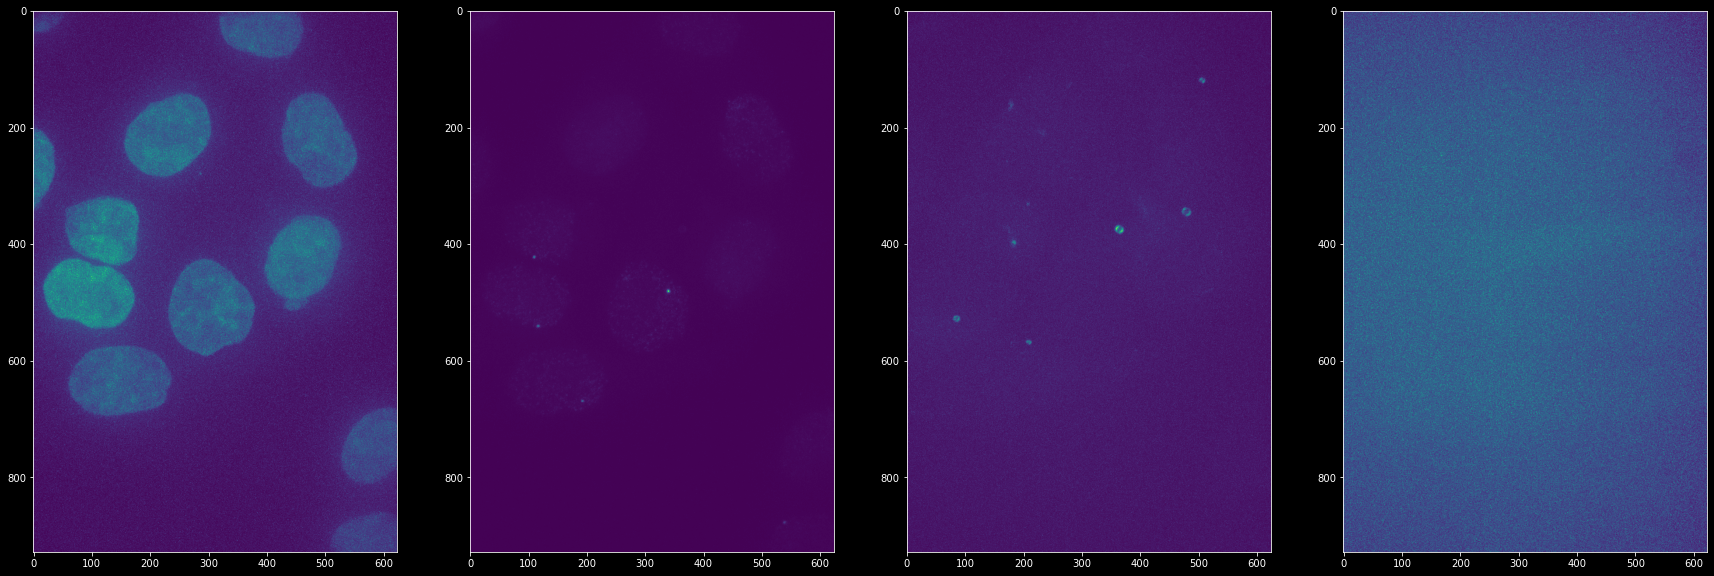

In [6]:
number_channels = list_images[0].shape[-1]
for i in range (0,1):#number_images ):
    fig, axes = plt.subplots(nrows=1, ncols=number_channels, figsize=(30, 10))
    for j in range(0,number_channels):
        axes[j].imshow(np.max(list_images[i][:,:,:,j],axis=0),cmap='viridis')   
    plt.show()

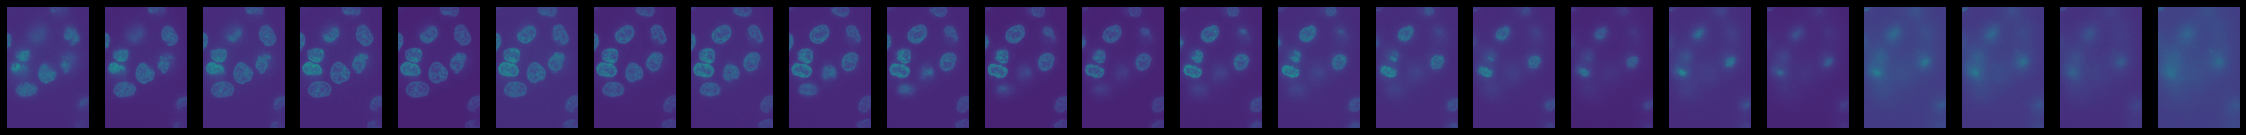

In [12]:
# Plotting z-slices for a single image
selected_image = 0
selected_channel = 0
number_z_slices = list_images[selected_image].shape[0]
for i in range (0,1):#number_images ):
    fig, axes = plt.subplots(nrows=1, ncols=number_z_slices, figsize=(40, 20))
    for j in range(0,number_z_slices):
        axes[j].imshow(list_images[selected_image][j,:,:,selected_channel],cmap='viridis')
        axes[j].axis('off')   
    plt.show()

In [ ]:
#